In [38]:
import pandas as pd
import geopandas as gpd
import requests
import json

In [17]:
url= "https://geodata.nationaalgeoregister.nl/bag/wfs/v2_0"

startIndex = 0
batch_size = 1
params = {'request':'GetFeature',
          'service':'WFS',
          'version':'2.0.0',
          'typeName': 'bag:pand',
          'outputFormat': 'json',
          'count': batch_size,
          'startIndex':startIndex,
          'bbox':'60000,430000,95000,460000'}

In [18]:
r = requests.get(url = url, params = params)
data = r.json()
for key, _ in data.items() :
    print (key)
print(data['totalFeatures'])
data

type
totalFeatures
features
crs
695197


{'type': 'FeatureCollection',
 'totalFeatures': 695197,
 'features': [{'type': 'Feature',
   'id': 'pand.262694',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[75121.709, 439174.169, 0],
      [75121.145, 439174.748, 0],
      [75123.141, 439176.692, 0],
      [75120.459, 439179.433, 0],
      [75118.41, 439177.558, 0],
      [75118.049, 439177.929, 0],
      [75111.147, 439171.277, 0],
      [75114.779, 439167.549, 0],
      [75121.709, 439174.169, 0]]]},
   'geometry_name': 'geometrie',
   'properties': {'identificatie': 556100000000388,
    'bouwjaar': 1977,
    'status': 'Pand in gebruik',
    'gebruiksdoel': 'woonfunctie',
    'oppervlakte_min': 114,
    'oppervlakte_max': 114,
    'aantal_verblijfsobjecten': 1,
    'actualiteitsdatum': None}}],
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:EPSG::28992'}}}

In [32]:
totalFeatures = data['totalFeatures']
batch_size = 1000
niter = totalFeatures//batch_size
startIndex = 0
#### TEST
#batch_size = 2
#niter = 3
print('number of iterations:{}'.format(niter))
params['count'] = batch_size
params['startIndex'] = startIndex
data_dir = 'bag_pand/'
for i in range(niter+1):
    print('iteration {}'.format(i))
    # retrieve data
    r = requests.get(url = url, params = params)
    data = r.json()
    
    # write data to file
    filename = 'data_'+str(i)+'.json'

    print('writing file to:{}{}'.format(data_dir,filename))
    with open(data_dir+filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    
    startIndex += batch_size
    params['startIndex'] = startIndex
    
    

number of iterations:695
iteration 695
writing file to:bag_pand/data_695.json
iteration 696
writing file to:bag_pand/data_696.json


In [54]:
criteria = 'Sloopvergunning verleend'
gdata = gpd.read_file(data_dir+'data_178.json')
gdata = gdata[gdata['status'] == criteria]
gdata.head()
#gdata_1=gpd.read_file(data_dir+'data_545.json')
#gdata_2=gpd.read_file(data_dir+'data_650.json')
#gdata = pd.concat([gdata_1, gdata_2])

,id,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,actualiteitsdatum,geometry
75,pand.2174299,1783100000004027,1973,Sloopvergunning verleend,woonfunctie,187,187,1,None,"POLYGON Z ((73648.14 451090.143 0, 73643.50599..."
82,pand.2174306,1783100000004037,2004,Sloopvergunning verleend,None,0,0,0,None,"POLYGON Z ((73628.421 451099.028 0, 73623.859 ..."
254,pand.2174478,1783100000004225,1965,Sloopvergunning verleend,woonfunctie,95,95,1,None,"POLYGON Z ((71397.997 448579.317 0, 71399.235 ..."
672,pand.2174896,1783100000004674,1964,Sloopvergunning verleend,None,0,0,0,None,"POLYGON Z ((73625.45 442929.408 0, 73616.00999..."
721,pand.2174945,1783100000004728,1961,Sloopvergunning verleend,woonfunctie,143,143,1,None,"POLYGON Z ((72449.56299999999 448985.736 0, 72..."


In [47]:
import matplotlib.pyplot as plt
gdata['status'].unique()

array(['Pand in gebruik', 'Sloopvergunning verleend'], dtype=object)

In [64]:
import os
gdata = gpd.GeoDataFrame()
criteria = 'Sloopvergunning verleend'
file_list = [f for f in os.listdir(data_dir) if f.endswith('.json') ]
for f in file_list:
    data = gpd.read_file(data_dir+f)
    print(f)
    data = data[data['status'] == criteria]
    if len(data.index) > 0:
        gdata = pd.concat([gdata, data])

gdata.head()


data_178.json
data_482.json
data_528.json
data_197.json
data_314.json
data_601.json
data_251.json
data_590.json
data_343.json
data_206.json
data_656.json
data_139.json
data_569.json
data_586.json
data_355.json
data_1.json
data_640.json
data_210.json
data_494.json
data_181.json
data_302.json
data_247.json
data_617.json
data_400.json
data_545.json
data_115.json
data_396.json
data_379.json
data_36.json
data_683.json
data_457.json
data_142.json
data_512.json
data_284.json
data_61.json
data_441.json
data_504.json
data_154.json
data_98.json
data_338.json
data_77.json
data_292.json
data_416.json
data_103.json
data_553.json
data_380.json
data_695.json
data_20.json
data_318.json
data_57.json
data_524.json
data_174.json
data_461.json
data_123.json
data_573.json
data_436.json
data_359.json
data_16.json
data_565.json
data_135.json
data_420.json
data_41.json
data_162.json
data_498.json
data_532.json
data_477.json
data_660.json
data_230.json
data_375.json
data_119.json
data_549.json
data_267.json
da

data_43.json
data_422.json
data_588.json
data_567.json
data_137.json
data_14.json
data_434.json
data_121.json
data_571.json
data_658.json
data_208.json
data_463.json
data_199.json
data_526.json
data_176.json
data_55.json
data_54.json
data_462.json
data_198.json
data_527.json
data_177.json
data_659.json
data_209.json
data_435.json
data_120.json
data_570.json
data_15.json
data_423.json
data_589.json
data_566.json
data_136.json
data_618.json
data_248.json
data_42.json
data_474.json
data_161.json
data_531.json
data_39.json
data_376.json
data_663.json
data_399.json
data_233.json
data_321.json
data_264.json
data_81.json
data_634.json
data_458.json
data_78.json
data_337.json
data_622.json
data_97.json
data_272.json
data_360.json
data_225.json
data_675.json
data_419.json
data_194.json
data_481.json
data_602.json
data_252.json
data_58.json
data_317.json
data_439.json
data_593.json
data_205.json
data_655.json
data_340.json
data_585.json
data_643.json
data_213.json
data_2.json
data_19.json
data_3

,id,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,actualiteitsdatum,geometry
75,pand.2174299,1783100000004027,1973,Sloopvergunning verleend,woonfunctie,187,187,1,None,"POLYGON Z ((73648.14 451090.143 0, 73643.50599..."
82,pand.2174306,1783100000004037,2004,Sloopvergunning verleend,None,0,0,0,None,"POLYGON Z ((73628.421 451099.028 0, 73623.859 ..."
254,pand.2174478,1783100000004225,1965,Sloopvergunning verleend,woonfunctie,95,95,1,None,"POLYGON Z ((71397.997 448579.317 0, 71399.235 ..."
672,pand.2174896,1783100000004674,1964,Sloopvergunning verleend,None,0,0,0,None,"POLYGON Z ((73625.45 442929.408 0, 73616.00999..."
721,pand.2174945,1783100000004728,1961,Sloopvergunning verleend,woonfunctie,143,143,1,None,"POLYGON Z ((72449.56299999999 448985.736 0, 72..."


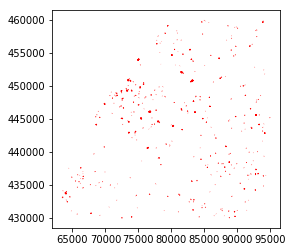

In [66]:
gdata.plot(color='black',edgecolor='red')

In [69]:
len(gdata.index)

789

In [70]:
 gdata.to_file(driver = 'ESRI Shapefile', filename = 'buildings_demolished.shp')

In [72]:
zh = gpd.read_file("zh.shp")

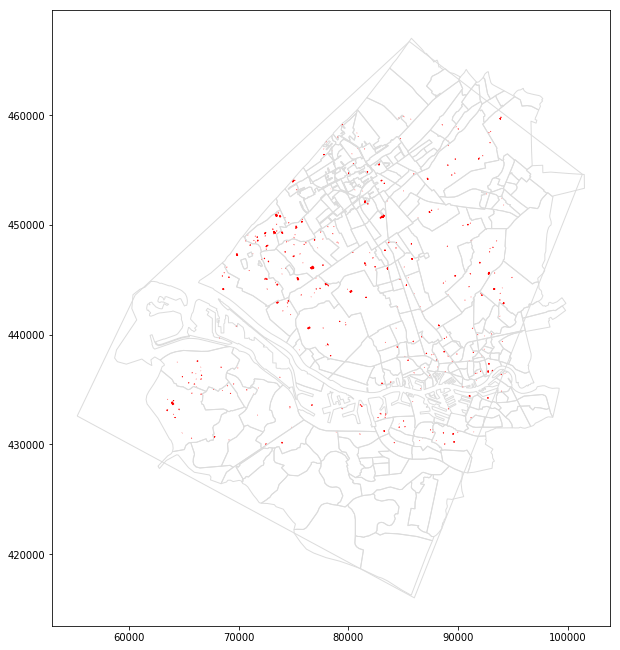

In [75]:
ax = zh.plot(figsize=(10,20),color='none', edgecolor='gainsboro', zorder=3)
gdata.plot(ax=ax,markersize=5, color='red', edgecolor='red')